In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Perceptron: 다수의 신호를 입력으로 받아 하나의 신호를 출력
# Weight: 각 신호가 결과에 주는 영향력을 조절( 가중치가 클수록 중요함을 의미 )하는 요소로 작용

def AND(x1, x2):
    w1, w2, theta = .5, .5, .7
    tmp = x1*w1 + x2*w2
    if tmp > theta:
        return 1
    else:
        return 0

In [3]:
# Theta = -b (b; bias), 뉴런이 얼마나 쉽게 활성화하는 지를 조정하는 매개변수

x = np.array([0, 1])
w = np.array([.5, .5])
b = -.7
print(np.sum(x*w) + b)

-0.19999999999999996


In [4]:
def AND(x1, x2):
    X = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -.7
    tmp = np.sum(X*w) + b
    
    # Activation function( 여기서는 Step function )
    # 입력 신호의 총합이 활성화를 일으키는 지를 정하는 역할 ( 다음 층의 뉴런에 신호를 보낼 지 여부를 결정 )
    if tmp > 0:
        return 1
    else:
        return 0
    
def NAND(x1, x2):
    X = np.array([x1, x2])
    w = np.array([-.5, -.5])
    b = .7
    tmp = np.sum(X*w) + b
    if tmp > 0:
        return 1
    else:
        return 0
    
def OR(x1, x2):
    X = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -.3
    tmp = np.sum(X*w) + b
    if tmp > 0:
        return 1
    else:
        return 0

In [5]:
# XOR 문제 -> 다층 퍼셉트론

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

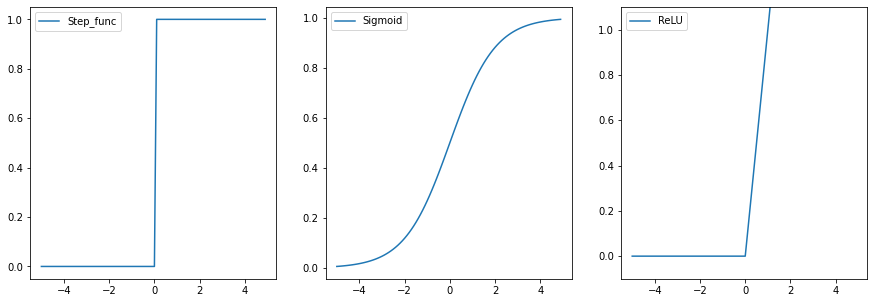

In [6]:
# 신경망( 다층 퍼셉트론 ): 퍼셉트론의 가중치 매개변수를 수동으로 설정했던 작업을 자동화한다.
# 단순 퍼셉트론과의 차이는, 'Activation function'과 '층의 구성'에 있다.
# Linear activation function 은 선형 연결로 층을 쌓는 이점이 사라지므로 ( ex. XOR 문제 ), Non-linear Activation function 을 사용한다. 

def step_function(x):
    return np.array(x > 0, dtype = np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

x = np.arange(-5.0, 5.0, .1)
y1 = step_function(x)
ax[0].plot(x, y1, label = 'Step_func')
plt.ylim(-.1, 1.1)
ax[0].legend()

y2 = sigmoid(x)
ax[1].plot(x, y2, label = 'Sigmoid')
plt.ylim(-.1, 1.1)
ax[1].legend()

y3 = ReLU(x)
ax[2].plot(x, y3, label = 'ReLU')
plt.ylim(-.1, 1.1)
ax[2].legend(loc = 'upper left')
plt.show()

In [7]:
# 항등함수: Regression 모델의 출력층에 적용

def identity_function(x):
    return x

In [8]:
# 입력 변수와 가중치 매개변수 곱의 총합

x = np.array([ [1.0, 2.0], [2.0, 3.0] ])
w = np.array( [ [.1, .2, .3], [.4, .5, .6] ] )
b = np.array( [1, 2, 3] )

a = np.dot(x, w) + b
z = sigmoid(a)
print(z)

[[0.86989153 0.96083428 0.98901306]
 [0.9168273  0.98015969 0.99550373]]


In [9]:
# 신경망 구현 ( Input_size: (2, ), hidden_layer: 2, Output_size: (2, ) ) 

def init_network():
    
    network={}
    network['W1'] = np.array( [ [.1, .2, .3], [.4, .5, .6] ] )
    network['b1'] = np.array( [.02, .03, .04] )
    network['W2'] = np.array( [ [1, 2], [3, 4], [5, 6] ] )
    network['b2'] = np.array( [.02, .03] )
    network['W3'] = np.array( [ [.1, .2], [.4, .5] ] )
    network['b3'] = np.array( [.02, .03] )
    
    return network

def forward(network, x):
    
    # w1, w2, w3 & b1, b2, b3 에 value 할당해서 코드 진행하는 것이 더 깔끔함.
    
    a1 = np.dot(x, network['W1']) + network['b1']
    z1 = sigmoid(a1)
    a2 = np.dot(z1, network['W2']) + network['b2']
    z2 = sigmoid(a2)
    a3 = np.dot(z2, network['W3']) + network['b3']
    y = identity_function(a3)
    
    return y

net = init_network()
y = forward(net, np.array([2, 3]))
print(y)

[0.51995846 0.72992401]


In [10]:
# Softmax function 원리

a = np.array([ 4000, 5000, 6000 ])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)

[inf inf inf]
[nan nan nan]


C:\Users\mb910\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Users\mb910\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [11]:
# 출력층 Softmax function 설계
# Softmax 에서 Exponential func 을 사용하는 이유는, 가장 큰 출력을 내는 뉴런에 더 큰 확률값을 주기 위함에 있다.
# 따라서, 학습 이외에 추론 단계에서는 softmax 출력층은 생략하는 것이 일반적이다. ( 자원 낭비를 막기 위해 )

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # Overflow 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

y = softmax(a)
print(y)

[0. 0. 1.]


In [12]:
from keras.datasets import mnist

(X_train, t_train), (X_test, t_test) = mnist.load_data()

Using TensorFlow backend.


In [13]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [14]:
# 신경망 학습 ( 훈련 데이터로부터 가중치 매개변수의 최적값을 향해 자동 업데이트 )
# How? Loss function을 낮추는 방향으로 업데이트 -> 'Gradient Descent'
# '정확도'가 아닌 '손실함수'를 평가 지표로 삼는 이유는, 정확도를 지표 삼을 경우 대부분의 미분 값이 0이기 때문. 
# 정확도 계산 시, 0 또는 1을 이용해 처리함 -> Step function 과 유사, ( 맞춘 갯수 / input 데이터 갯수 )로 불연속적임. 미분 불가 

# MSE

def mean_squared_error(y, t):
    return .5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [.1, .05, .6, .0, .05, .1, .0, .1, .0, .0]
mean_squared_error( np.array(y), np.array(t) )

# CEE ( Cross-Entropy Error )
# Information Theory 에서 차용한 개념. log 함수를 사용하는 이유는 두 가지가 있다.

# 첫 번째 이유는, 정보량의 개념을 표현하는데 유리하기 때문이다.
# 높은 확률로 발생하는 사건은 불확실성의 정도가 낮아 정보량이 작다. 이를 -log P(x)로 변환하면 낮은 값이 도출된다.

# 두 번째 이유는, entropy가 additive 해야 하기 때문이다. 
# 독립 사건들의 전체 정보량은 개별 정보량들의 총합과 같아야 하는데, 경우의 수는 곱 연산이다. 여기서 log 함수를 이용하여 곱을 덧셈으로 변환해준다.
# 따라서, 각 사건이 발생할 확률과 log 함수와의 곱을 총합한 것이 CEE 이다.
# 여기서 One-hot-encoding 한 정답 레이블은 '확률'의 개념으로 이해할 수 있다.

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]    
    delta = 1e-7
    return -np.sum(t*np.log(y + delta)) / batch_size

# Mini-batch: 방대한 양의 데이터셋에서 일부만을 추출하여 손실 함수를 계산하는 방법

train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[ batch_mask ]
t_batch = t_train[ batch_mask ]

In [15]:
# 수치 미분 ( Numerical - gradient )
# 반올림 오차 ( rounding error ) 주의 필요: 소수점 8자리 이하 생략 (비트 수의 제한)

def numerical_diff(f, x):
    h = 1e-4 # .0001
    return ( f(x+h)-f(x-h) ) / 2*h

def function_1(x):
    return 0.01*x[0]**2 + 0.1 * x[1]

numerical_diff(function_1, np.array([5,4]))

1.999999999996449e-09

In [16]:
# 함수에서 주어진 입력 벡터 x 위치의 기울기 값 도출 

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        idx = it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / 2*h
        x[idx] = tmp_val
        it.iternext()
    
    return grad

numerical_gradient(function_1, np.array([3.0, 4.0]))

array([6.e-10, 1.e-09])

In [17]:
# 경사하강법

def gradient_descent(f, init_x, lr = .1, step_num = 100):
    
    x = init_x
    
    for idx in range( step_num ):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x)

array([-2.9999994,  3.9999992])

### SimpleNet

In [19]:
def softmax(x):
    
    # Batch 데이터가 들어오는 경우 ( 같은 sample 내 value를 통해 연산하므로 전치행렬을 이용 )
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis = 0)
        y = np.exp(x) / np.sum( np.exp(x), axis = 0 )
        return y.T
    
    x = x - np.max(x)
    return np.exp(x) / np.sum( np.exp(x) )

def cross_entropy_error(y, t):
    
    if y.ndim == 1:
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
        pass
    
    # t값이 One-hot encoding 된 경우
    if t.size == y.size:
        t = t.argmax(axis = 1)
        pass
    
    batch_size = y.shape[0]
    
    return -np.sum(np.log(y[ np.arange(batch_size), t ])) / batch_size

In [20]:
class simpleNet:
    
    def __init__(self):
        
        self.W = np.random.randn(2,3)
        
    def predict(self, x):
        
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        
        a = np.dot(x, self.W)
        y = softmax(a)
        loss = cross_entropy_error(y, t)
        
        return loss

In [21]:
net = simpleNet()
y = net.predict(np.array([.6, .9]))

x = np.array([.6, .9])
y.argmax()

t = np.array([0, 0, 1])
net.loss(x, t)

0.9890777038708566

### TwoLayerNet

In [22]:
.01 * np.random.randn(784, 50)

array([[-0.00871799,  0.00172983, -0.00599008, ..., -0.01894958,
         0.00301141,  0.000937  ],
       [ 0.0095755 ,  0.02406109, -0.00665607, ...,  0.00428897,
        -0.00428311,  0.01117784],
       [-0.00052989,  0.00600635,  0.00034707, ...,  0.01508052,
         0.01357221,  0.00781164],
       ...,
       [-0.0080443 ,  0.00362579,  0.0090269 , ..., -0.01514916,
         0.0053569 , -0.00119131],
       [-0.00353638, -0.01202747,  0.01626379, ..., -0.0124099 ,
        -0.00224911,  0.00577605],
       [-0.00155155, -0.00748308, -0.01425067, ..., -0.00667512,
         0.00929114, -0.00078223]])

In [23]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = .01):
        
        # 가중치 초기화
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        
        W1, W2, b1, b2 = self.params['W1'], self.params['W2'], self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z = sigmoid(a1)
        a2 = np.dot(z, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        
        accuracy = np.sum(y == t) / y.shape[0]
        
        return accuracy
    
    def numerical_gradient(self, x, t):
        
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [24]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
x = np.random.rand(100, 784)
y = net.predict(x)

t = np.random.rand(100, 10)
# grads = net.numerical_gradient(x, t)

In [25]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

### MNIST로 TwoLayerNet 학습

In [26]:
network2 = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

iter_num = 1
train_size = X_train.shape[0]
batch_size = 100
learning_rate = .1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)


batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

grad = network2.numerical_gradient(X_batch, t_batch)

# for key in network2.params.keys():
#     network2.params[key] -= learning_rate * grad[key]    
#     pass

# loss = network2.loss(X_batch, t_batch)
# train_loss_list.append(loss)

# train_acc = network2.accuracy(X_train, t_train)
# test_acc = network2.accuracy(X_test, t_test)


# print(train_acc, test_acc)

In [27]:
network2.params

{'W1': array([[-0.02445634,  0.00476091,  0.00721189, ...,  0.00072855,
          0.01664473,  0.01736884],
        [-0.00494387, -0.02086114, -0.0081586 , ...,  0.02102165,
          0.00834063,  0.00040006],
        [ 0.00826349, -0.00762427,  0.01360627, ..., -0.00346053,
          0.0066341 ,  0.00948036],
        ...,
        [ 0.00168253, -0.00217762,  0.01111971, ...,  0.01115658,
         -0.01968684,  0.00179268],
        [-0.003721  , -0.00402866,  0.01836932, ...,  0.00333438,
         -0.0105826 , -0.00829223],
        [-0.00295141, -0.00592196, -0.01024872, ..., -0.00410211,
          0.00456232, -0.00756324]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'W2': array([[ 3.12668995e-03, -9.12330329e-03, -4.98049923e-03,
          6.21601151e-04,  7.50029467e-04,  2.72650040e-03,
         

In [28]:
grad

{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 2.94535196e-13,  9.12050657e-14, -3.17916604e-13, -6.02872685e-13,
         8.41091818e-13,  4.98801800e-13,  3.56696450e-14,  1.82505788e-14,
        -5.54221002e-13, -3.62121377e-13, -3.76417253e-13,  1.45493839e-14,
        -2.16160911e-13,  2.09802997e-13,  1.72856640e-13, -3.37969186e-13,
        -2.01596961e-13, -3.66820863e-13, -2.73520362e-13,  1.15047660e-13,
        -8.41151504e-13, -3.60798968e-13, -4.07290002e-13,  5.29604627e-13,
        -1.08874820e-13, -9.62179003e-14, -7.17884641e-14, -5.16301668e-13,
        -1.13659215e-13, -6.61459021e-13, -7.09992820e-13, -1.10583405e-12,
         1.18837880e-12, -1.24934603e-12,  2.57588550e-13, -2.98650438e-13,
        -4.34145586e-13, -4.25914393e-13,  1.07835403e-